# Projet 2 : Explorer et comprendre les performances des employés (Python)

Problématique métier

Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.

Objectif Étudier les distributions des scores de performance et des heures travaillées pour détecter les facteurs d'amélioration.

## Importation des Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
data = pd.read_csv('HRDataset_v14.csv')

In [3]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Nettoyage des données

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [6]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [7]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [8]:
data.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [9]:
#listes des colonnes à conserver pour l'analyse des performances
columns_to_keep = [
    'Employee_Name', 'EmpID','EmpStatusID','DeptID','Salary','Sex',
    'PerfScoreID', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
    'SpecialProjectsCount', 'DaysLateLast30', 'Absences',
    'Department', 'RecruitmentSource', 'EmploymentStatus',
]

In [10]:
data = data[columns_to_keep]

In [11]:
data

,Employee_Name,EmpID,EmpStatusID,DeptID,Salary,Sex,PerfScoreID,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Department,RecruitmentSource,EmploymentStatus
0,"Adinolfi, Wilson K",10026,1,5,62506,M,4,Exceeds,4.60,5,0,0,1,Production,LinkedIn,Active
1,"Ait Sidi, Karthikeyan",10084,5,3,104437,M,3,Fully Meets,4.96,3,6,0,17,IT/IS,Indeed,Voluntarily Terminated
2,"Akinkuolie, Sarah",10196,5,5,64955,F,3,Fully Meets,3.02,3,0,0,3,Production,LinkedIn,Voluntarily Terminated
3,"Alagbe,Trina",10088,1,5,64991,F,3,Fully Meets,4.84,5,0,0,15,Production,Indeed,Active
4,"Anderson, Carol",10069,5,5,50825,F,3,Fully Meets,5.00,4,0,0,2,Production,Google Search,Voluntarily Terminated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,1,5,65893,M,3,Fully Meets,4.07,4,0,0,13,Production,LinkedIn,Active
307,"Ybarra, Catherine",10301,5,5,48513,F,1,PIP,3.20,2,0,5,4,Production,Google Search,Voluntarily Terminated
308,"Zamora, Jennifer",10010,1,3,220450,F,4,Exceeds,4.60,5,6,0,16,IT/IS,Employee Referral,Active
309,"Zhou, Julia",10043,1,3,89292,F,3,Fully Meets,5.00,3,5,0,11,IT/IS,Employee Referral,Active


In [12]:
data.describe()

,EmpID,EmpStatusID,DeptID,Salary,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,2.392283,4.610932,69020.684887,2.977492,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,1.794383,1.083487,25156.636930,0.587072,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,1.000000,1.000000,45046.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,1.000000,5.000000,55501.500000,3.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,1.000000,5.000000,62810.000000,3.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,5.000000,5.000000,72036.000000,3.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,5.000000,6.000000,250000.000000,4.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [13]:
np.unique(data['PerformanceScore'])

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [14]:
np.unique(data["Department"])

array(['Admin Offices', 'Executive Office', 'IT/IS', 'Production       ',
       'Sales', 'Software Engineering'], dtype=object)

In [15]:
#Salaire moyen
avg_salary = data['Salary'].mean()
avg_salary

69020.6848874598

In [16]:
#Salaire moyen par département
avg_salary_by_dept = data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
avg_salary_by_dept

Department
Executive Office        250000.000000
IT/IS                    97064.640000
Software Engineering     94989.454545
Admin Offices            71791.888889
Sales                    69061.258065
Production               59953.545455
Name: Salary, dtype: float64

In [17]:
count_perf_score = data['PerformanceScore'].value_counts()
count_perf_score

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

In [28]:
pd.crosstab(data['Department'], data['PerformanceScore'])


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Department,,,,
Admin Offices,0,9,0,0
Executive Office,0,1,0,0
IT/IS,6,42,1,1
Production,27,159,15,8
Sales,2,24,1,4
Software Engineering,2,8,1,0


In [32]:
pd.crosstab(data['Department'], data['Sex'])


Sex,F,M
Department,,
Admin Offices,6,3
Executive Office,1,0
IT/IS,22,28
Production,126,83
Sales,15,16
Software Engineering,6,5


In [37]:
avg_absences_by_dept = data.groupby('PerformanceScore')['Absences'].sum().sort_values(ascending=False)
avg_absences_by_dept

PerformanceScore
Fully Meets          2484
Exceeds               388
Needs Improvement     204
PIP                   108
Name: Absences, dtype: int64

In [19]:
good_performers = data[data['PerformanceScore'] == 'Exceeds']

,Employee_Name,EmpID,EmpStatusID,DeptID,Salary,Sex,PerfScoreID,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Department,RecruitmentSource,EmploymentStatus
0,"Adinolfi, Wilson K",10026,1,5,62506,M,4,Exceeds,4.60,5,0,0,1,Production,LinkedIn,Active
5,"Anderson, Linda",10002,1,5,57568,F,4,Exceeds,5.00,5,0,0,15,Production,LinkedIn,Active
12,"Barbossa, Hector",10012,1,3,92328,M,4,Exceeds,4.28,4,5,0,9,IT/IS,Diversity Job Fair,Active
16,"Beak, Kimberly",10023,2,5,70131,F,4,Exceeds,4.40,3,0,0,16,Production,Employee Referral,Active
22,"Billis, Helen",10003,1,5,62910,F,4,Exceeds,5.00,3,0,0,19,Production,Indeed,Active
36,"Candie, Calvin",10001,1,5,72640,M,4,Exceeds,5.00,3,0,0,14,Production,Indeed,Active
51,"Clukey, Elijian",10029,2,5,50373,M,4,Exceeds,4.10,4,0,0,5,Production,Employee Referral,Active
55,"Corleone, Vito",10019,1,5,170500,M,4,Exceeds,3.70,5,0,0,15,Production,Indeed,Active
76,"Dougall, Eric",10028,1,3,138888,M,4,Exceeds,4.30,5,5,0,4,IT/IS,Indeed,Active
77,"Driver, Elle",10006,1,6,74241,F,4,Exceeds,4.77,5,0,0,14,Sales,Indeed,Active


In [20]:
good_performers.describe()

,EmpID,EmpStatusID,DeptID,Salary,PerfScoreID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.0,37.000000
mean,10019.000000,1.891892,4.675676,77144.864865,4.0,4.478649,4.108108,1.108108,0.0,10.486486
std,10.824355,1.612172,0.818333,39150.109316,0.0,0.386625,0.842740,2.195751,0.0,5.918998
min,10001.000000,1.000000,3.000000,46738.000000,4.0,3.600000,3.000000,0.000000,0.0,1.000000
25%,10010.000000,1.000000,5.000000,57815.000000,4.0,4.200000,3.000000,0.000000,0.0,5.000000
50%,10019.000000,1.000000,5.000000,62910.000000,4.0,4.500000,4.000000,0.000000,0.0,12.000000
75%,10028.000000,2.000000,5.000000,74241.000000,4.0,4.760000,5.000000,0.000000,0.0,15.000000
max,10037.000000,5.000000,6.000000,220450.000000,4.0,5.000000,5.000000,7.000000,0.0,19.000000


In [21]:
good_performers_count = good_performers['Department'].value_counts()
good_performers_count

Department
Production              27
IT/IS                    6
Sales                    2
Software Engineering     2
Name: count, dtype: int64

### Visualisations

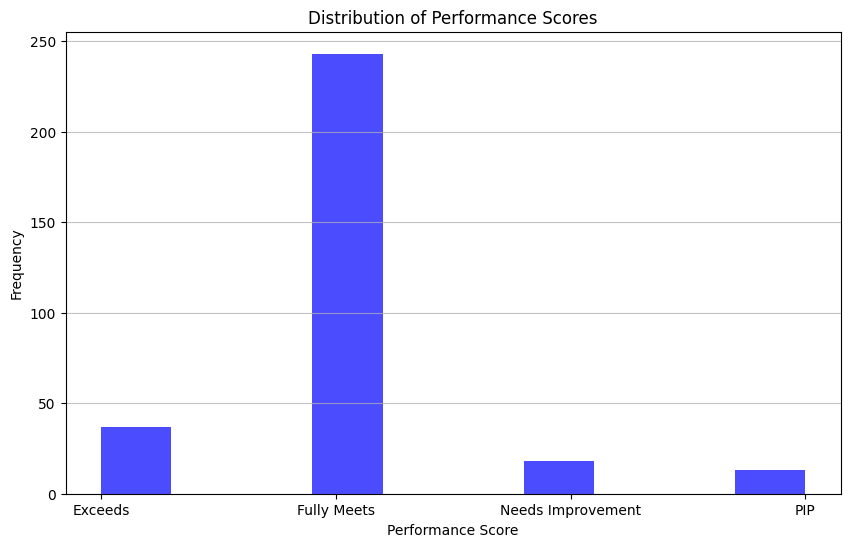

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(data['PerformanceScore'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


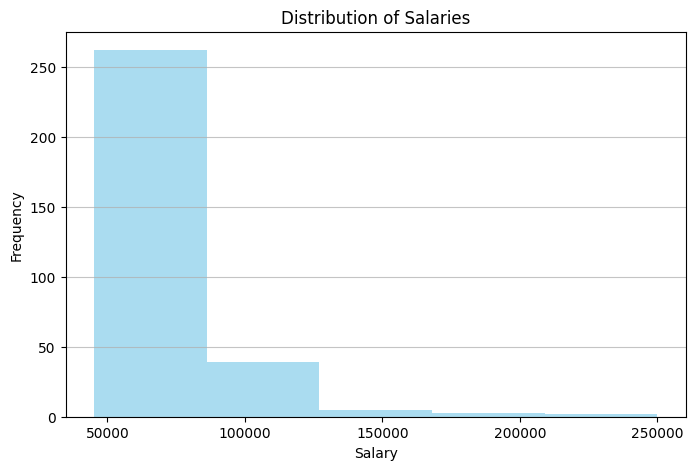

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(data['Salary'], bins=5, color='skyblue', alpha=0.7)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
pd.crosstab(data['Department'], data['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Department,,,,
Admin Offices,0,9,0,0
Executive Office,0,1,0,0
IT/IS,6,42,1,1
Production,27,159,15,8
Sales,2,24,1,4
Software Engineering,2,8,1,0


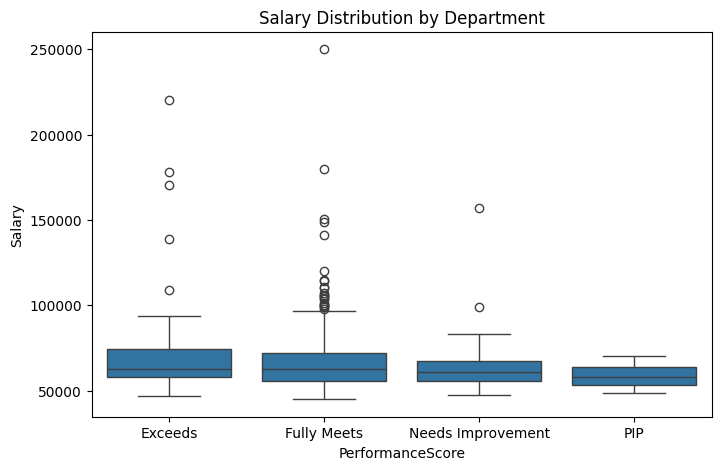

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PerformanceScore', y='Salary', data=data)
plt.title('Salary Distribution by Department')
plt.show()

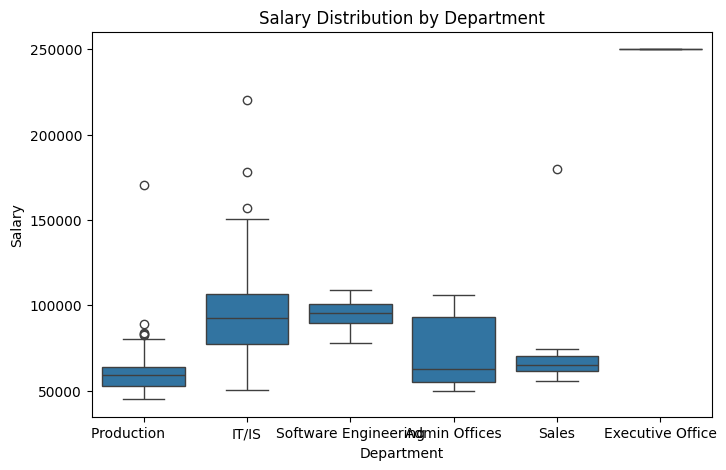

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Department', y='Salary', data=data)
plt.title('Salary Distribution by Department')
plt.show()


### Analyse des heures travaillées

Statistiques sur les absences :
count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64


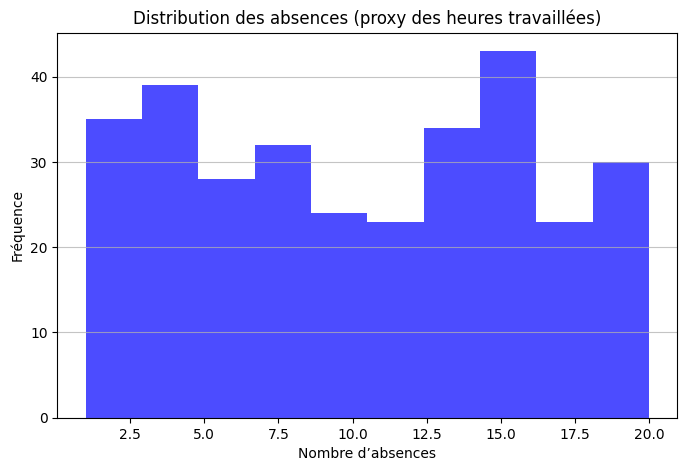

C:\Users\vanst\AppData\Local\Temp\ipykernel_25996\1168671314.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Absences', data=data, palette="Set2")


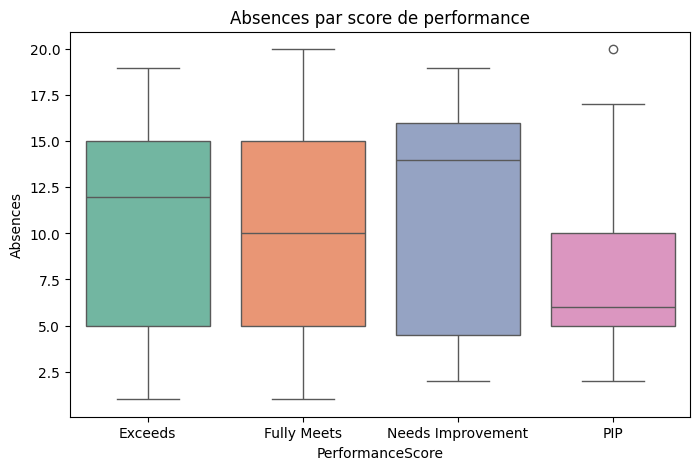

In [48]:
# Statistiques descriptives sur les absences
print("Statistiques sur les absences :")
print(data['Absences'].describe())

# Histogramme des absences
plt.figure(figsize=(8,5))
plt.hist(data['Absences'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution des absences (proxy des heures travaillées)')
plt.xlabel('Nombre d’absences')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Relation Absences - Performance
plt.figure(figsize=(8,5))
sns.boxplot(x='PerformanceScore', y='Absences', data=data, palette="Set2")
plt.title("Absences par score de performance")
plt.show()


C:\Users\vanst\AppData\Local\Temp\ipykernel_25996\761619358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Absences', data=data, palette='pastel')


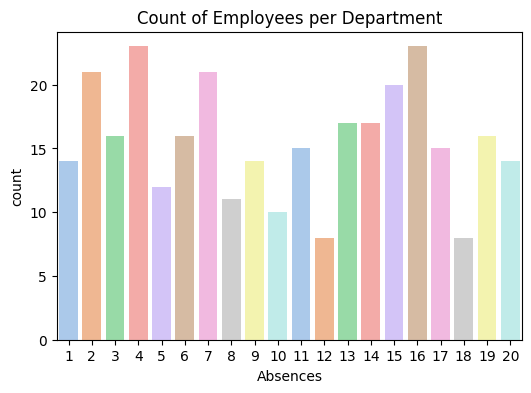

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Absences', data=data, palette='pastel')
plt.title('Count of Employees per Department')
plt.show()

In [51]:
pd.crosstab(data['Department'], data['Absences'])

Absences,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Department,,,,,,,,,,,,,,,,,,,,
Admin Offices,0,1,2,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
Executive Office,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
IT/IS,1,7,0,2,1,1,4,5,2,2,3,1,3,2,3,5,4,0,3,1
Production,11,10,13,17,9,13,12,4,8,7,11,7,12,12,17,15,8,5,9,9
Sales,1,2,0,1,2,1,5,1,2,0,1,0,1,1,0,3,2,3,2,3
Software Engineering,1,1,1,2,0,0,0,1,1,0,0,0,1,1,0,0,0,0,2,0
